<a href="https://colab.research.google.com/github/amantha6/flight-fare-detection/blob/main/flight_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

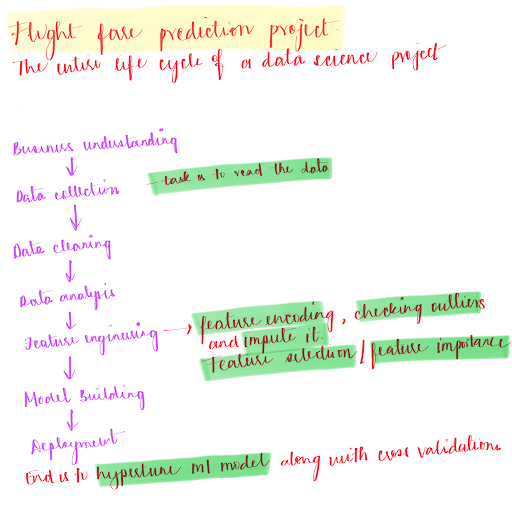

In [2]:
## import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Collection**



In [4]:
train_data=pd.read_excel("/content/Data_Train.xlsx")

# **Data Cleaning (missing values)**
## **Data Overview:**

The dataset contains flight information with 11 features:

Airline

Date_of_Journey

Source

Destination

Route

Dep_Time (Departure Time)

Arrival_Time

Duration

Total_Stops

Additional_Info

Price (target variable)


```



In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Two features have missing values

In [10]:
train_data.isnull().sum()
train_data.dropna(inplace=True) #update the training data hence leveraging the training data
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


# **Data Cleaning (preprocessing)**
#### From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,because our
model will not be able to understand these string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.
Date of Journey cannot be a String data type. Likewise for arrival and departure time (datetime64[ns])


In date-time , we have 4 data-types in Pandas :
datetime64[ns] or datetime64[ns, tz]  or datetime64[ns, UTC] or dtype('<M8[ns]')
     means ‘big-endian’  , < is little-endian
     imagine , data represented a single unsigned 4-byte little-endian integer, the dtype string would be <u4..
     (u is type-character code for unsigned integer)
     
where ,   UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone
          M =  M is a character of Data-time , just like int we have i for "Integer" ,


datetime64[ns] is a general dtype, while <M8[ns] is a specific dtype , ns is basicaly nano second..
Both are similar , it entirely how your numpy was compiled..

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')



In [13]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])
import warnings
from warnings import filterwarnings
filterwarnings("ignore")
data=train_data.copy()
for feature in ['Dep_Time', 'Arrival_Time' , 'Date_of_Journey']:
    change_into_Datetime(feature)


In [17]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [18]:
data["Journey_day"] = data['Date_of_Journey'].dt.day
data["Journey_month"] = data['Date_of_Journey'].dt.month
data["Journey_year"] = data['Date_of_Journey'].dt.year

In [19]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-19 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-19 05:50:00,2025-02-19 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-19 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


This is exactly the right approach for datetime features. Machine learning models can't effectively work with string datetime values, so converting them to numerical representations is essential.

Clean the departure time feature and arrival time feature and then extract the derived features.
Why? Because the algorithm needs to understand what the feature is all about.


In [20]:
def extract_hour_min(df , col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)
extract_hour_min(data , "Dep_Time")
extract_hour_min(data , "Arrival_Time")
## we have extracted derived attributes from ['Arrival_Time' , "Dep_Time"] , so lets drop both these features ..
cols_to_drop = ['Arrival_Time' , "Dep_Time"]

data.drop(cols_to_drop , axis=1 , inplace=True )
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


Converted date and time columns to datetime objects
Extracted day, month, and year from journey dates
Extracted hours and minutes from departure and arrival times
Dropped the original datetime columns after extracting useful features

# **Data Analysis**


Let us analyse when most of the flights take off

In [22]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

<Axes: xlabel='Dep_Time_hour'>

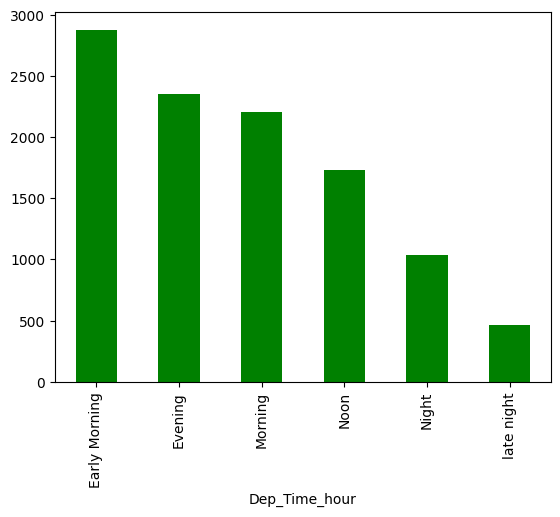

In [31]:
#### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time
    and convert into appropriate format.

    '''

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar" , color="g")

In [36]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00


In [40]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
go_offline(connected=True)


In [48]:
temp_series = data['Dep_Time_hour'].apply(flight_dep_time)
from IPython.display import display
fig.show(renderer="colab")


In [52]:

data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,time_period,temp_date,day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night,2019-03-24,Sunday
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,Early Morning,2019-05-01,Wednesday
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,Morning,2019-06-09,Sunday


Pre-process Duration Feature & extract meaningful features from it.
 -->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..
    
    -->> As my ML model is not able to understand this duration as it contains string values ,
    thats why we have to tell our ML Model that this is hour & this is minute for each of the row .

In [53]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'

    return x

In [54]:
data['Duration'] = data['Duration'].apply(preprocess_duration)
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


'''
    Now after pre-processing duration feature , still my ml_model is not able to understand duration
    because it is string data so any how we have to convert it into numerical(integer of float) values

'''

In [60]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data['Duration_mins'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_hour"] = pd.to_timedelta(data["Duration"]).dt.components.hours
data["Duration_minute"] = pd.to_timedelta(data["Duration"]).dt.components.minutes

Lets Analyse whether Duration impacts Price or not ?

In [63]:
data['Duration_total_mins'] = data['Duration'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [64]:
data['Duration_total_mins']

,Duration_total_mins
0,170
1,445
2,1140
3,325
4,285
...,...
10678,150
10679,155
10680,180
10681,160


In [65]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'time_period', 'temp_date',
       'day_of_week', 'Duration_hour', 'Duration_minute', 'Duration_hours',
       'Duration_mins', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

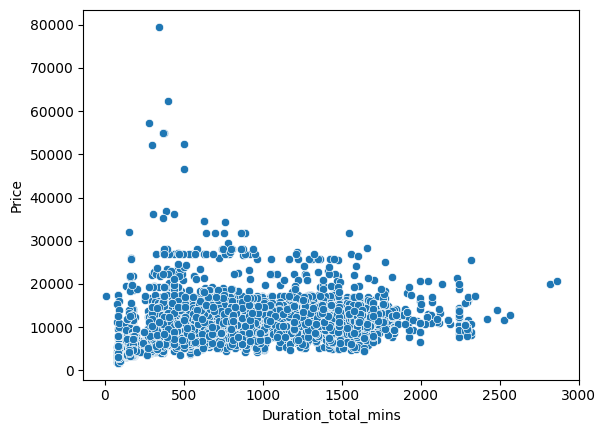

In [66]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , data=data)

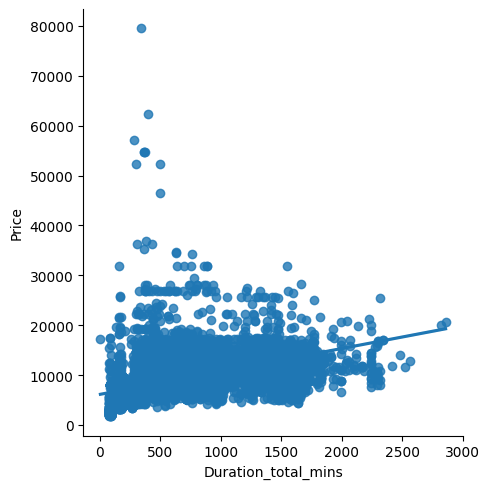

In [67]:
sns.lmplot(x="Duration_total_mins" , y="Price" , data=data)

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

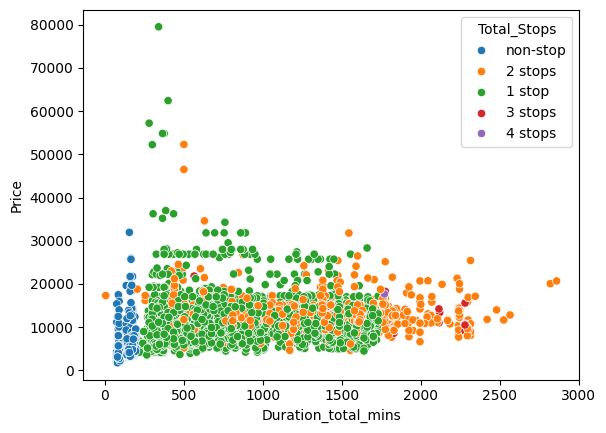

In [68]:
sns.scatterplot(x="Duration_total_mins" , y="Price" , hue="Total_Stops", data=data)


Non stops flights take less duration while their fare is also low, then as the stop increases,
duration also increases and price also increases(in most of the cases)

